In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                       download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

torch.Size([1, 3, 32, 32])


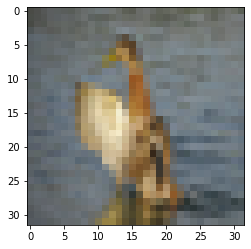

 bird


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

ship


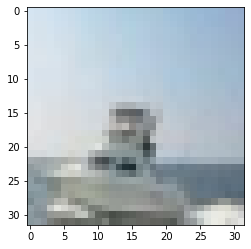

In [4]:
(data, labels) = trainset[100]
print(classes[labels])
imshow(data)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #in_channel, out_channel, kennel_size
        self.pool = nn.MaxPool2d(2, 2) #kernel, stride
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120) #in_features, out_features
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [12]:
data.size()

torch.Size([3, 32, 32])

In [24]:
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)

data_1 = data.unsqueeze(0)

conv1_o = conv1(data_1)
pool_o = conv2(pool(conv1_o))
pool_o.size()

torch.Size([1, 16, 10, 10])

In [88]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [89]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.228
[1,  4000] loss: 2.076
[1,  6000] loss: 1.967
[1,  8000] loss: 1.830
[1, 10000] loss: 1.784
[1, 12000] loss: 1.748
[1, 14000] loss: 1.694
[1, 16000] loss: 1.671
[1, 18000] loss: 1.713
[1, 20000] loss: 1.698
[1, 22000] loss: 1.616
[1, 24000] loss: 1.619
[1, 26000] loss: 1.610
[1, 28000] loss: 1.548
[1, 30000] loss: 1.576
[1, 32000] loss: 1.571
[1, 34000] loss: 1.607
[1, 36000] loss: 1.572
[1, 38000] loss: 1.537
[1, 40000] loss: 1.526
[1, 42000] loss: 1.531
[1, 44000] loss: 1.569
[1, 46000] loss: 1.515
[1, 48000] loss: 1.557
[1, 50000] loss: 1.533
[2,  2000] loss: 1.498
[2,  4000] loss: 1.498
[2,  6000] loss: 1.492
[2,  8000] loss: 1.507
[2, 10000] loss: 1.495
[2, 12000] loss: 1.480
[2, 14000] loss: 1.494
[2, 16000] loss: 1.513
[2, 18000] loss: 1.455
[2, 20000] loss: 1.510
[2, 22000] loss: 1.483
[2, 24000] loss: 1.488
[2, 26000] loss: 1.485
[2, 28000] loss: 1.493
[2, 30000] loss: 1.505
[2, 32000] loss: 1.513
[2, 34000] loss: 1.498
[2, 36000] loss: 1.507
[2, 38000] 

In [26]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

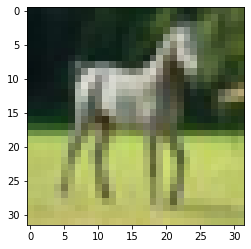

GroundTruth:  horse


In [27]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [28]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [29]:
outputs = net(images)

In [30]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                             for j in range(1)))

Predicted:    car


In [31]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' %
     (100 * correct / total))

KeyboardInterrupt: 

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
device